In [1]:
import sys
sys.path.insert(0, "..")
from random import randint, seed
from tqdm import tqdm
from grafo import *
import matplotlib.pyplot as plt

In [2]:
class Karger:

    def __init__(self, graph):
        self.graph = graph


    def run(self):
        nodes = [[i + 1] for i in range(len(self.graph))]
        super_nodes = [[i + 1] for i in range(len(graph))]
        key_node = len(nodes) 

        E = []
        for i in range(len(self.graph)):
            for j in range(i + 1, len(self.graph)):
                if self.graph.adjacency_matrix[i][j] == 1:
                    E.append((i + 1, j + 1))

        E_ = E.copy()
        while len(nodes) > 2:

            random_edge = E_[randint(0, len(E_) - 1)]
            key_node += 1

            nodes.append([key_node])
            nodes.remove([random_edge[0]])
            nodes.remove([random_edge[1]])
            
            list_aux = super_nodes[random_edge[0] - 1].copy()
            list_aux.extend(super_nodes[random_edge[1] - 1])
            super_nodes.append(list_aux)


            E_ = [edge for edge in E_ if edge != random_edge]

            for i, edge in enumerate(E_):
                if edge[0] == random_edge[0] or edge[0] == random_edge[1]:
                    if key_node > edge[1]:
                        E_[i] = (edge[1], key_node)
                    else:
                        E_[i] = (key_node, edge[1])

                elif edge[1] == random_edge[0] or edge[1] == random_edge[1]:
                    if key_node < edge[0]:
                        E_[i] = (key_node, edge[0])
                    else:
                        E_[i] = (edge[0], key_node)
            
        group_1 = super_nodes[E_[0][0] - 1] 
        group_2 = super_nodes[E_[0][1] - 1]

        cont_edges = 0

        for v1 in group_1:
            for v2 in group_2:
                if self.graph.adjacency_matrix[v1 - 1][v2 - 1] == 1:
                    cont_edges += 1

        return cont_edges

    def execute(self, n):
        min_cut = sys.maxsize
        for i in range(n):
            cut = self.run()
            if cut < min_cut:
                min_cut = cut

        return min_cut

In [3]:
class Naive_cut:
    def __init__(self, graph):
        self.graph = graph
        
    def run(self):
        
        nodes = [i + 1 for i in range(len(self.graph))]
        group_1 = []
        group_2 = []
        
        for i in range(len(self.graph)):
            if randint(0, 1) == 1:
                group_1.append(nodes[i])
            else:
                group_2.append(nodes[i])
        
        if len(group_1) == 0:
            group_1.append(group_2.pop())
        
        elif len(group_2) == 0:
            group_2.append(group_1.pop())
            
        cont_edges = 0

        for v1 in group_1:
            for v2 in group_2:
                if self.graph.adjacency_matrix[v1 - 1][v2 - 1] == 1:
                    cont_edges += 1

        return cont_edges
    
    def execute(self, n):
        min_cut = sys.maxsize
        for i in range(n):
            cut = self.run()
            if cut < min_cut:
                min_cut = cut

        return min_cut

In [4]:
name_file = "graph_type2_3"

arquivo_graph_1 = open(f"./Instancias/in/{name_file}", 'r').readlines()
matrix_, list_ = read_graph(arquivo_graph_1)
graph = Graph(matrix_, list_)

karger = Karger(graph)
naive = Naive_cut(graph)

min_cut_real = int(open(f"./Instancias/out/{name_file}", 'r').readlines()[0])

n_exec = 100
n_iter = [1, 5, 10, 25, 50, 100]

probabilidades_karger = []
probabilidades_naive = []

for i in tqdm(range(len(n_iter))):
    
    it = n_iter[i]
    
    n_acertos_karger = 0
    n_acertos_naive = 0
    
    for _ in tqdm(range(n_exec)):

        min_cut_karger = karger.execute(it)
        min_cut_naive = naive.execute(it)
        
        if min_cut_karger == min_cut_real:
            n_acertos_karger += 1
            
        if min_cut_naive == min_cut_real:
            n_acertos_naive += 1
    
    
    probabilidades_karger.append(n_acertos_karger / n_exec)
    probabilidades_naive.append(n_acertos_naive / n_exec)
    
print(probabilidades_karger)
print(probabilidades_naive)

100%|██████████| 6/6 [00:20<00:00,  3.44s/it]

[0.23, 0.55, 0.91, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


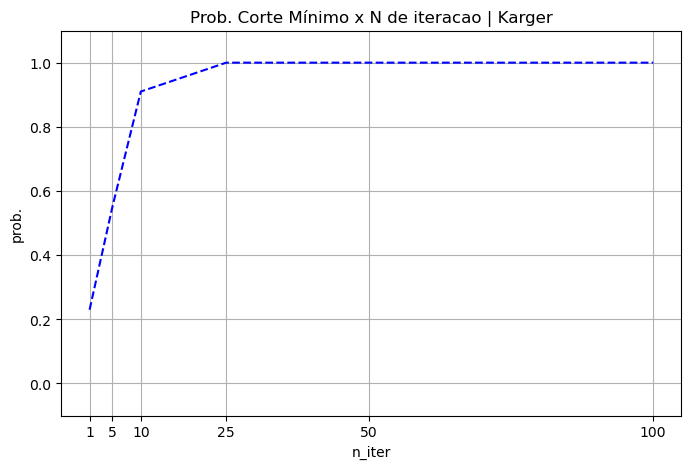

In [5]:
plt.figure(figsize=(8, 5))
plt.plot(n_iter, probabilidades_karger, 'b--')
plt.title('Prob. Corte Mínimo x N de iteracao | Karger')
plt.ylabel('prob.')
plt.xlabel('n_iter')
plt.ylim([-0.1, 1.1])
plt.xticks(n_iter)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()

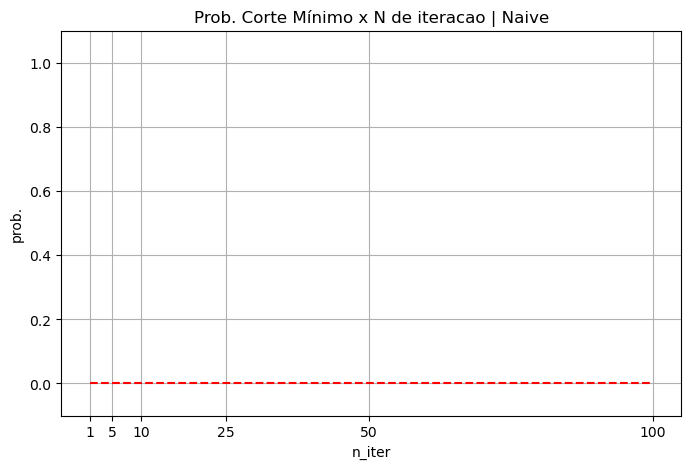

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(n_iter, probabilidades_naive, 'r--')
plt.title('Prob. Corte Mínimo x N de iteracao | Naive')
plt.ylabel('prob.')
plt.xlabel('n_iter')
plt.ylim([-0.1, 1.1])
plt.xticks(n_iter)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()

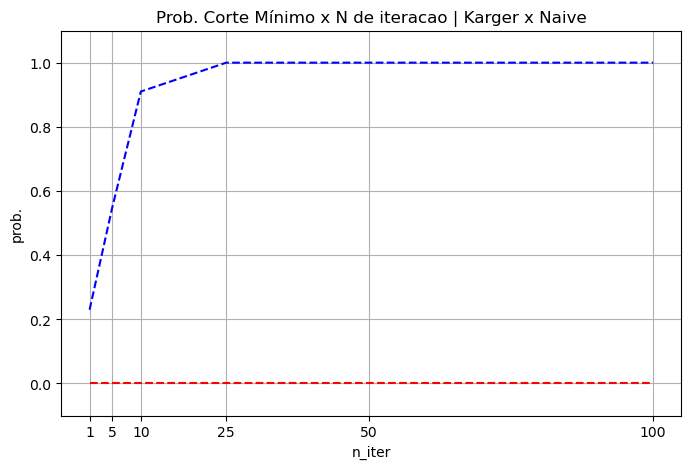

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(n_iter, probabilidades_karger, 'b--')
plt.plot(n_iter, probabilidades_naive, 'r--')
plt.title('Prob. Corte Mínimo x N de iteracao | Karger x Naive')
plt.ylabel('prob.')
plt.xlabel('n_iter')
plt.ylim([-0.1, 1.1])
plt.xticks(n_iter)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True)
plt.show()

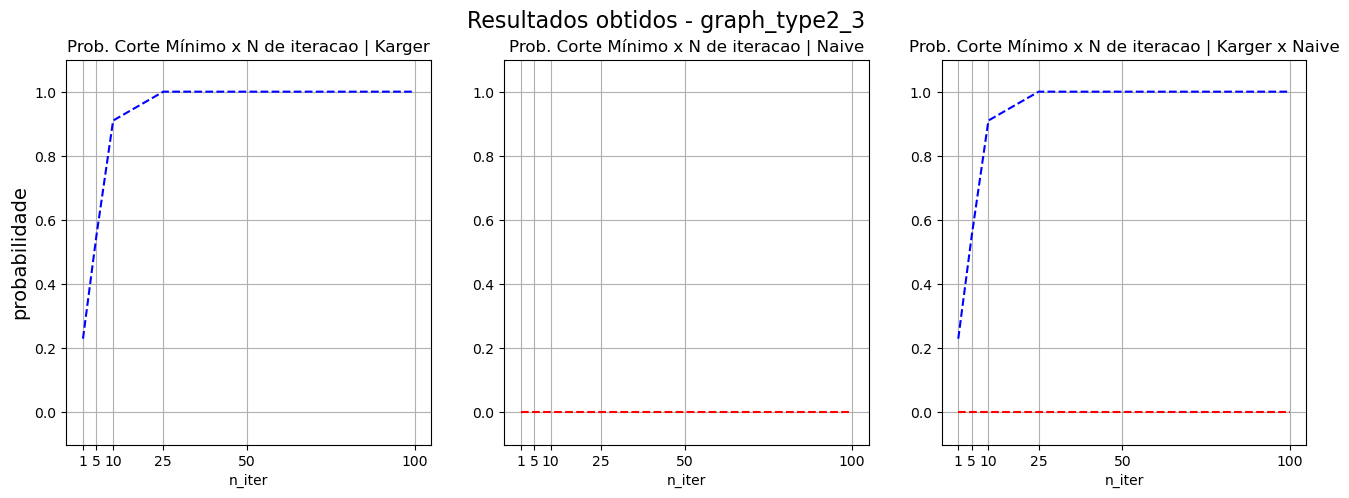

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

fig.suptitle(f'Resultados obtidos - {name_file}', fontsize=16)

axs[0].plot(n_iter, probabilidades_karger, 'b--')
axs[0].set_title('Prob. Corte Mínimo x N de iteracao | Karger', fontsize=12)
axs[0].set_ylabel('probabilidade', fontsize=14)
axs[0].set_xlabel('n_iter')
axs[0].set_ylim([-0.1, 1.1])
axs[0].set_xticks(n_iter)
axs[0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[0].grid(True)


axs[1].plot(n_iter, probabilidades_naive, 'r--')
axs[1].set_title('Prob. Corte Mínimo x N de iteracao | Naive', fontsize=12)
axs[1].set_xlabel('n_iter')
axs[1].set_ylim([-0.1, 1.1])
axs[1].set_xticks(n_iter)
axs[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[1].grid(True)


axs[2].plot(n_iter, probabilidades_karger, 'b--')
axs[2].plot(n_iter, probabilidades_naive, 'r--')
axs[2].set_title('Prob. Corte Mínimo x N de iteracao | Karger x Naive', fontsize=12)
axs[2].set_xlabel('n_iter')
axs[2].set_ylim([-0.1, 1.1])
axs[2].set_xticks(n_iter)
axs[2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
axs[2].grid(True)


plt.show()

100%|██████████| 3/3 [00:27<00:00,  9.20s/it]


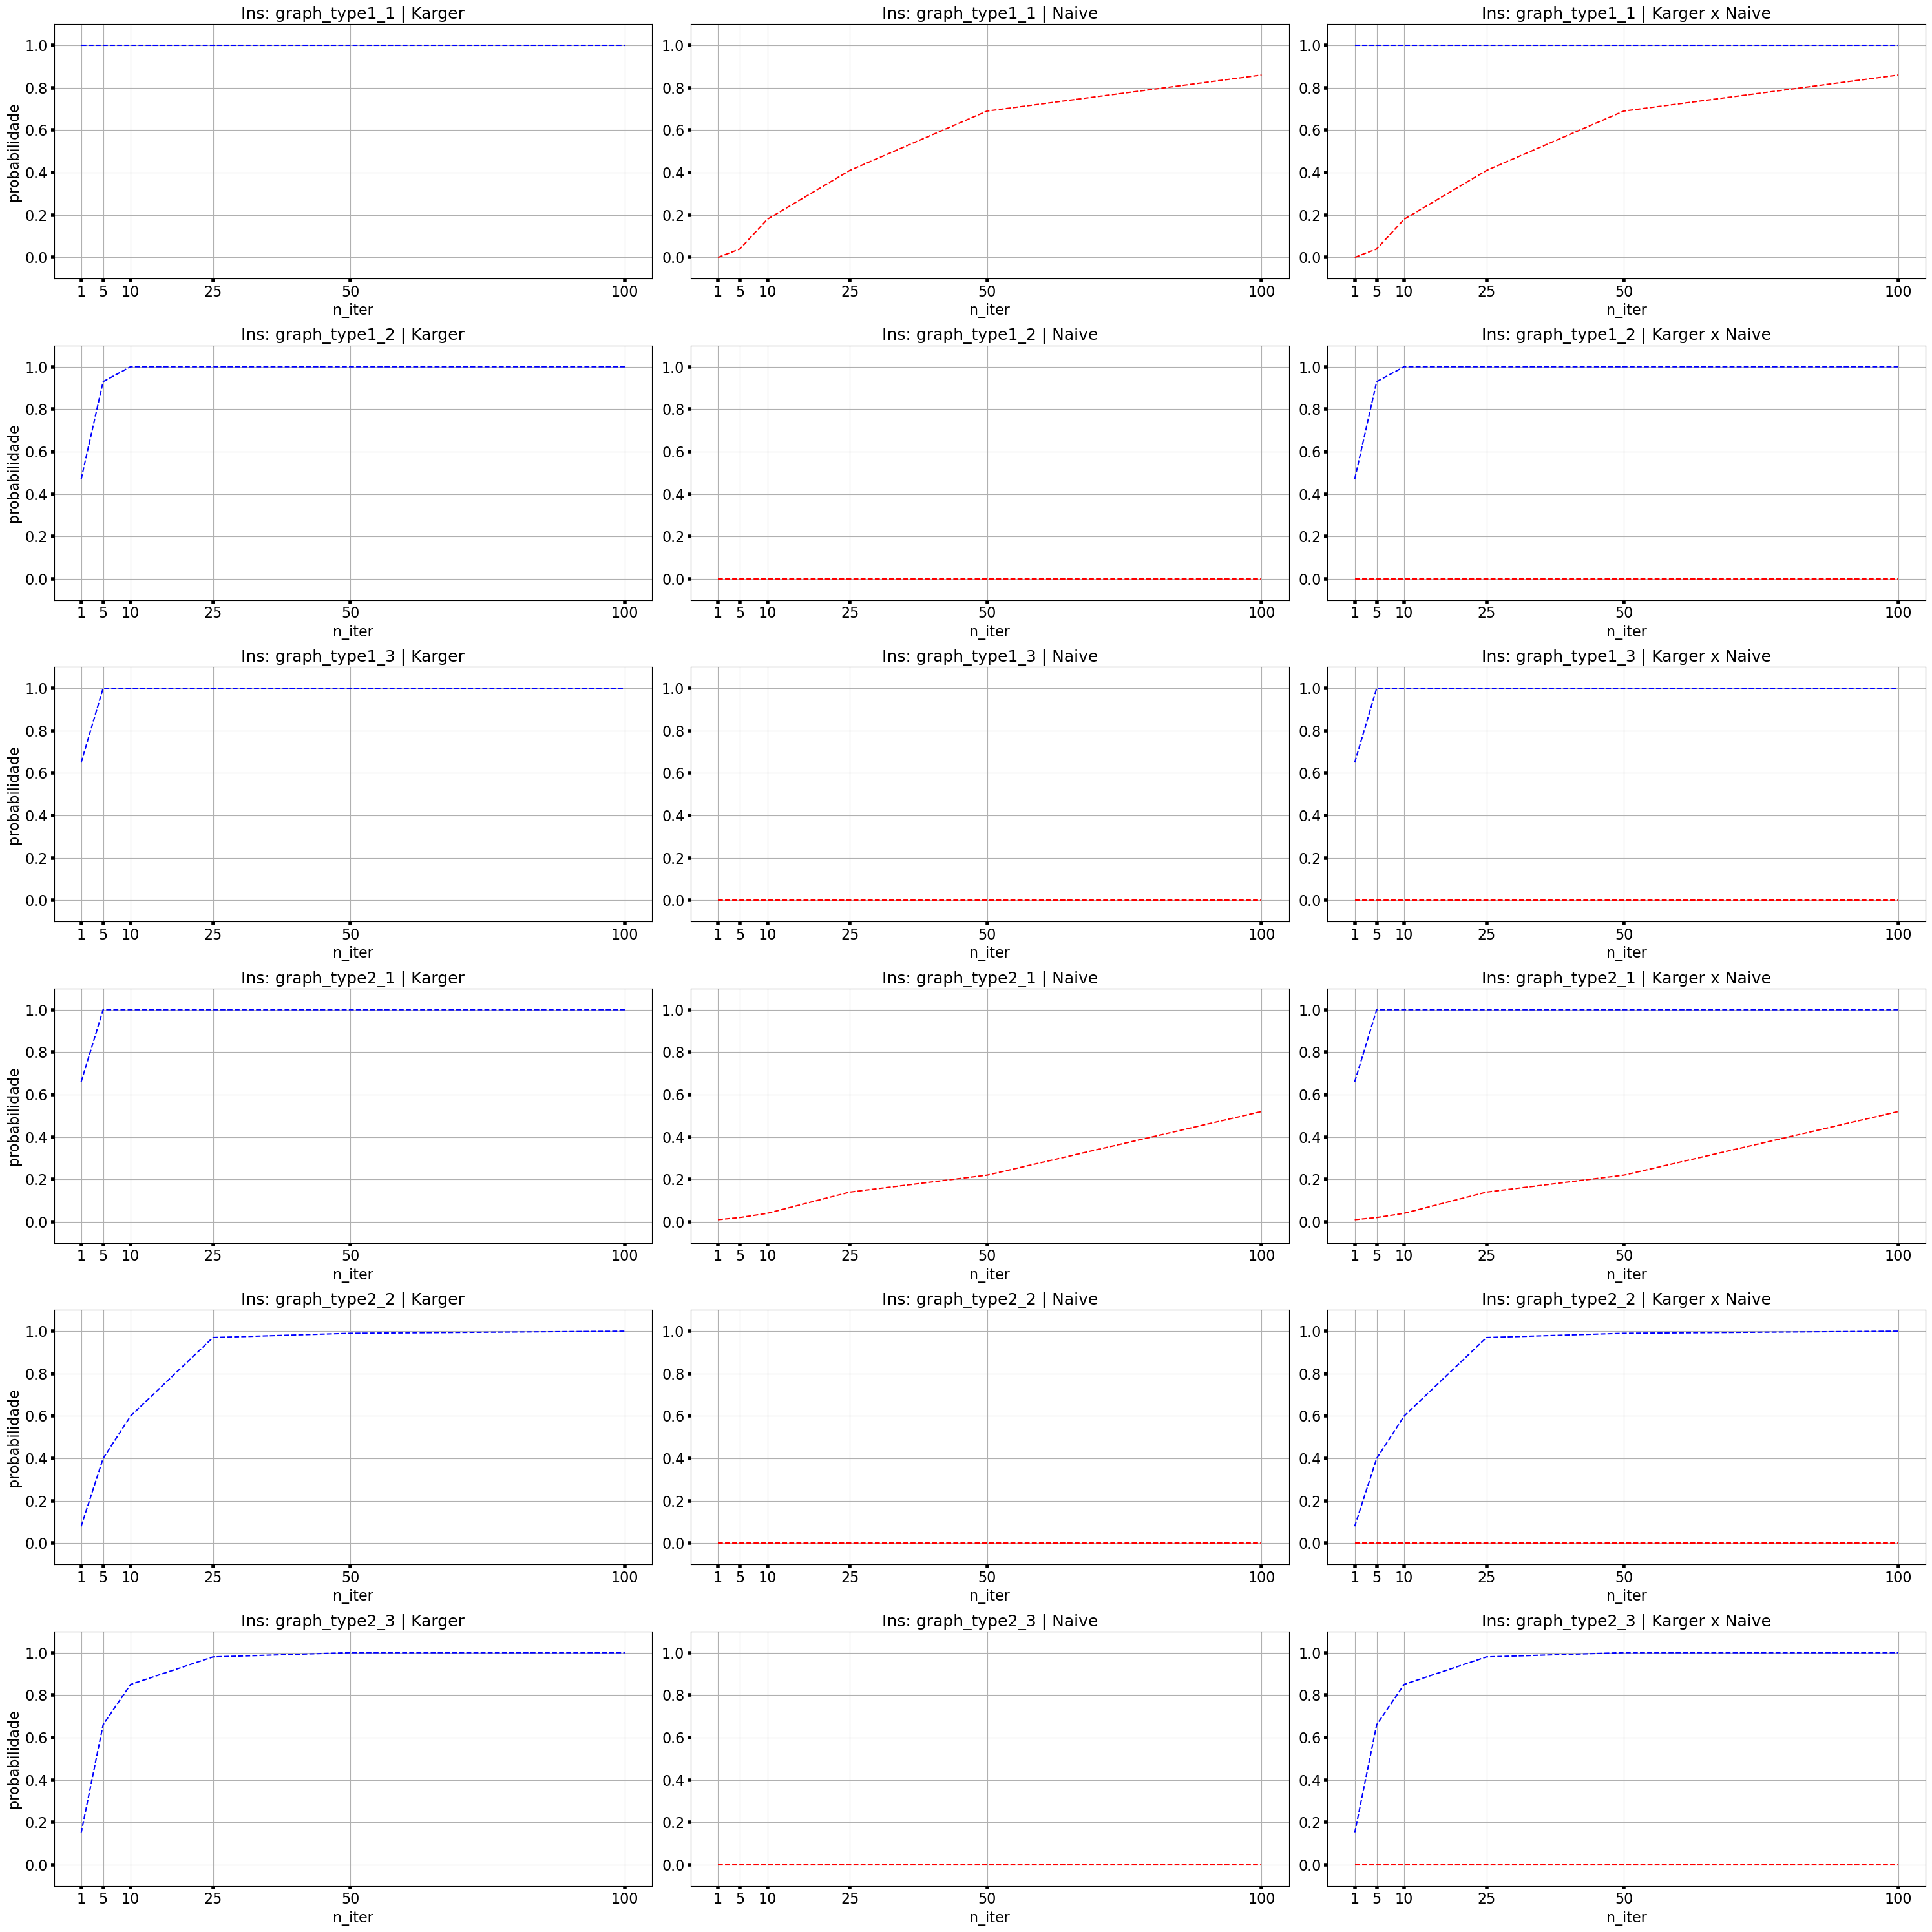

In [9]:
n_exec = 100
n_iter = [1, 5, 10, 25, 50, 100]

names_file = ["graph_type1", "graph_type2"]

fig, axs = plt.subplots(6, 3, figsize=(30, 30))

l = 0

for name_file in names_file:
    for i in tqdm(range(1, 3 + 1)):

        arquivo_graph = open(f"./Instancias/in/{name_file}_{i}", 'r').readlines()
        arquivo_out = open(f"./Instancias/out/{name_file}_{i}", 'r').readlines()
        min_cut_real = int(arquivo_out[0])
        matrix_, list_ = read_graph(arquivo_graph)
        
        graph = Graph(matrix_, list_)
        karger = Karger(graph)
        naive = Naive_cut(graph)
        
        probabilidades_karger = []
        probabilidades_naive = []

        for j in range(len(n_iter)):

            it = n_iter[j]

            n_acertos_karger = 0
            n_acertos_naive = 0

            for _ in range(n_exec):

                min_cut_karger = karger.execute(it)
                min_cut_naive = naive.execute(it)

                if min_cut_karger == min_cut_real:
                    n_acertos_karger += 1

                if min_cut_naive == min_cut_real:
                    n_acertos_naive += 1


            probabilidades_karger.append(n_acertos_karger / n_exec)
            probabilidades_naive.append(n_acertos_naive / n_exec)
        

        axs[l][0].plot(n_iter, probabilidades_karger, 'b--')
        axs[l][0].set_title(f'Ins: {name_file}_{i} | Karger', fontsize=18)
        axs[l][0].set_ylabel('probabilidade', fontsize=16)
        axs[l][0].set_xlabel('n_iter', fontsize=16)
        axs[l][0].set_ylim([-0.1, 1.1])
        axs[l][0].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][0].set_xticks(n_iter)
        axs[l][0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][0].grid(True)

        axs[l][1].plot(n_iter, probabilidades_naive, 'r--')
        axs[l][1].set_title(f'Ins: {name_file}_{i} | Naive', fontsize=18)
        axs[l][1].set_xlabel('n_iter' , fontsize=16)
        axs[l][1].set_ylim([-0.1, 1.1])
        axs[l][1].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][1].set_xticks(n_iter)
        axs[l][1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][1].grid(True)

        axs[l][2].plot(n_iter, probabilidades_karger, 'b--')
        axs[l][2].plot(n_iter, probabilidades_naive, 'r--')
        axs[l][2].set_title(f'Ins: {name_file}_{i} | Karger x Naive', fontsize=18)
        axs[l][2].set_xlabel('n_iter' , fontsize=16)
        axs[l][2].set_ylim([-0.1, 1.1])
        axs[l][2].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][2].set_xticks(n_iter)
        axs[l][2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][2].grid(True)
    
        l += 1

fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.tight_layout()
plt.show()